# Stock Price Predictor

**Regression Problem - Predicting the Stock Price of Natural Gas**

In [1]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=d21d8db4cf8b673cfd0d96432b5e677ae36f165223db7cb7205d527f268c99a3
  Stored in directory: /Users/dhruv/Library/Caches/pip/wheels/21/c9/66/b41c847de65c7985db52ec21d59996841598b8b0e93f2b9500
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

%matplotlib inline

In [4]:
stocks = input("Enter the code of the stock - ")
#downloading the data from the yahoo finance site
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
data.head()

Enter the code of the stock - NG=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,7.349,7.540,7.283,7.483,27299
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675


In [5]:
data.shape

(3283, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3283 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3283 non-null   float64
 1   High    3283 non-null   float64
 2   Low     3283 non-null   float64
 3   Close   3283 non-null   float64
 4   Volume  3283 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.9 KB


In [7]:
data.describe()

,Open,High,Low,Close,Volume
count,3283.000000,3283.000000,3283.000000,3283.000000,3283.000000
mean,3.714812,3.788431,3.636149,3.708224,131365.895218
std,1.831245,1.866609,1.790444,1.826208,54415.091229
min,1.441000,1.567000,1.432000,1.482000,0.000000
25%,2.691500,2.737000,2.644000,2.693000,91735.000000
50%,3.253000,3.313000,3.184000,3.242000,126609.000000
75%,4.158500,4.245000,4.068000,4.153000,161479.000000
max,13.580000,13.694000,13.306000,13.577000,459196.000000


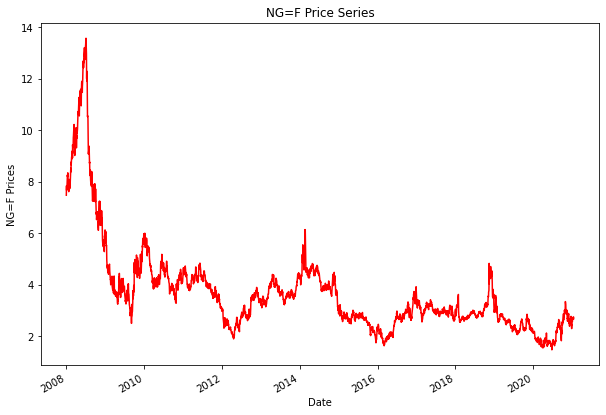

In [9]:
data.Close.plot(figsize = (10,7), color = 'r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

As we can see the closing price of natural gas started low in 2008, shot upwards in 2009 and drastically went down in 2010. <br>
WE CAN CLEARLY SEE THAT THE STOCK PRICES PERFORM IN A NON LINEAR MANNER

/Users/dhruv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

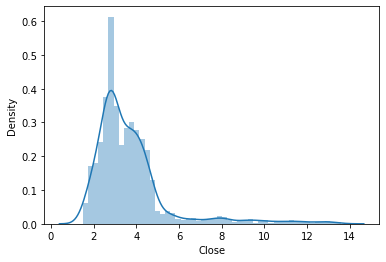

In [11]:
sns.distplot(data["Close"])

/Users/dhruv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

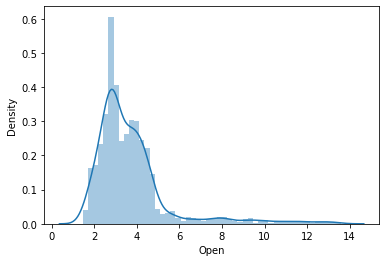

In [12]:
sns.distplot(data["Open"])

/Users/dhruv/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

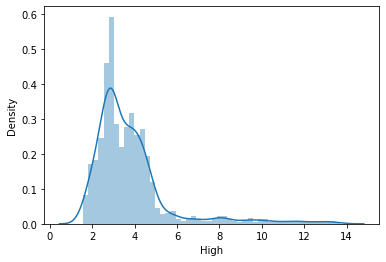

In [13]:
sns.distplot(data["High"])

We can clearly see that the above plots for the given data are extremely non-linear

In [15]:
#Splitting data in x and y, training and testing set
X = data.drop("Close", axis = 1)
y = data["Close"]

from sklearn.model_selection import train_test_split

#Splitting data in 80% training & 20% testing to validate model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#Random state means if the model is run again, the data will not change
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2626, 4)
(657, 4)
(2626,)
(657,)


In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [18]:
# MSE - Mean Square Error
# Cost Function for Linear Regression
# RMSE - Square Root Of MSE
# r2_square = 1.0 implies good model

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

#helper function
def calculate_metrics(y_test, y_pred) :
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)
    print("MSE - ", mse)
    print("RMSE - ", rmse)
    print("R2 Score - ", r2_scores)
    
calculate_metrics(y_test, pred1)
    
# y_test - ground truth
# y_pred - model predicted value

MSE -  0.0013865447236289627
RMSE -  0.03723633606611911
R2 Score -  0.9994903556172761


In [20]:
#MSE ~ 0 
#R2 Score ~ 1
#Both these imply that this is a good model
#Thus linear regression performs very good on this data

In [21]:
# Going on to regularised linear models - ridge & lasso

# Lasso - eliminates less important features
# Ridge - penalises less important features

from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

In [22]:
calculate_metrics(y_test, la_p)

MSE -  0.23080191549056567
RMSE -  0.48041847954732725
R2 Score -  0.9151654485086915


In [23]:
calculate_metrics(y_test, ri_p)

MSE -  0.0014485479006936697
RMSE -  0.038059793755269744
R2 Score -  0.9994675654610239


In [24]:
# As we can see ridge model is less prone to Overfitting, and hence we are going to use Ridge Regression to save our model

In [28]:
# We can also try to use SVM for this task
# SVM might not work well in this case
# Works very well when there are many features

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C' : [0.1, 1, 10, 1000],
             'gamma' : [1, 0.1, 0.01, 0.0001],
              'kernel' : ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.080 total time=   0.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.071 total time=   0.2s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.064 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.067 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.043 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.080 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.063 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.067 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.042 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.080 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [29]:
svr = SVR(C = 10, gamma = 0.01, kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [31]:
calculate_metrics(y_test, svr_pred)

MSE -  2.716279911062092
RMSE -  1.6481140467401192
R2 Score -  0.0015923936765451785


In [32]:
# As we can see, SVM is performing very bad, because of less features
# Regularised linear models are more powerful in this case

In [35]:
import joblib

joblib.dump(ri, 'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")

In [36]:
# from the above code, a pkl file is added in the cd
# from this pkl file, we can make predicitions

In [37]:
# Linear Regression doesnt work well when data is highly correlated
# We can use Principal Component Analysis to remove multi-colinearlity from the data